In [1]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import main

import plotly.express as px

# import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [2]:
### Definining name of analysis ###
name = 'dragbuild_comparison'

# figure_path = "/Users/williamkemp/Dropbox/Apps/Overleaf/Thesis_Draft_01/Figures/"
figure_path = '../Figures/'+name+'/'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)


In [3]:
# Importing Drag Build Ups
build_turbulent = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildLaminar.pkl")
build_freewake = pd.read_pickle("../../DragBuilds/CREATeV_DragBuild_FreeWake.pkl")

In [4]:
mass = 12.6 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

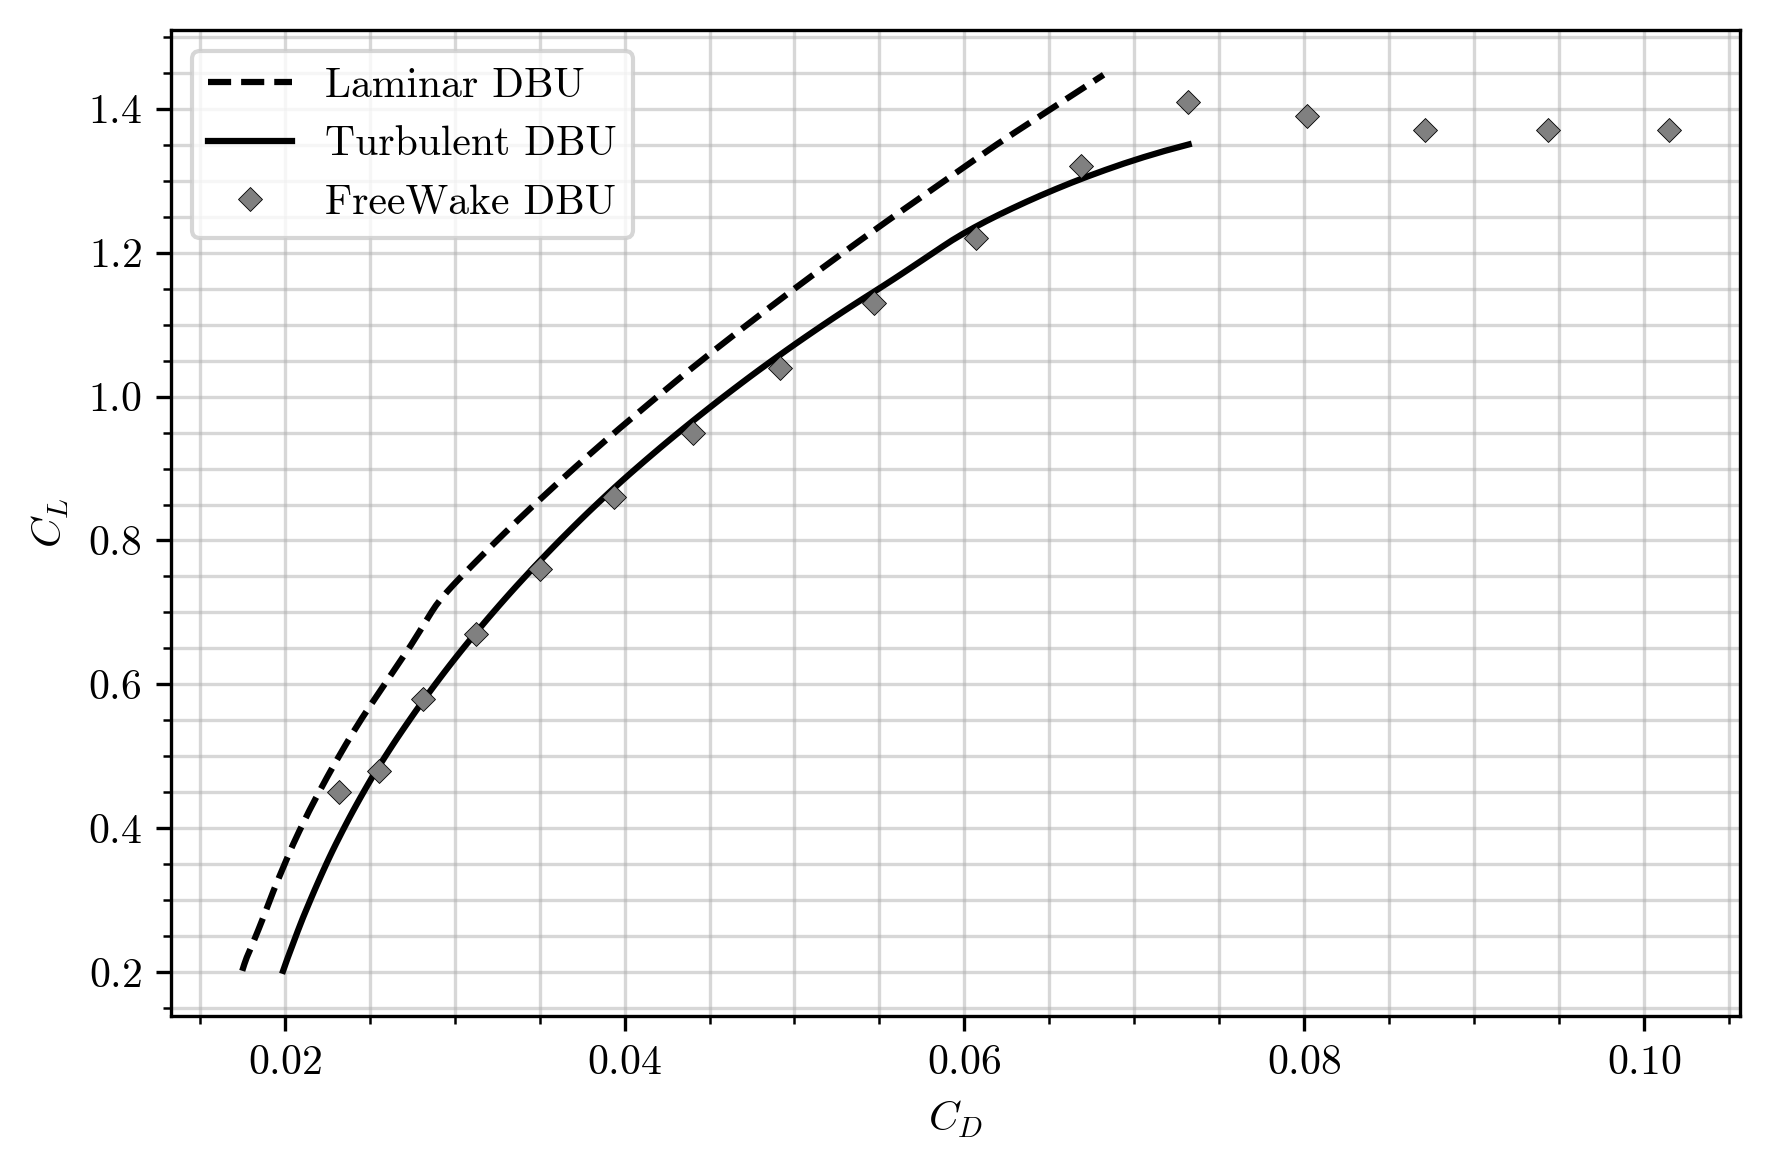

In [8]:
polar_dbu_comparison = plt.figure(dpi=300, figsize=(6,4))

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')
plt.plot(build_freewake.CD, build_freewake.CL, linestyle="", marker="D", color="grey", label='FreeWake DBU')


plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
# plt.xlim([0.01, 0.06])
# plt.ylim([0.2, 1.5])
plt.show()

main.save_figure(polar_dbu_comparison, f'{polar_dbu_comparison=}'.split('=')[0], figure_path, overwrite=True)